# Target -> Final_Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib created a temporary cache directory at /var/folders/71/mxfxb8zn4lscytqc_wf1kjl80000gn/T/matplotlib-axrn61az because the default path (/Library/Java/JavaVirtualMachines/jdk-21.jdk/Contents/Home/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Reading the dataset

In [2]:
df = pd.read_csv("t20I_cricket_dataset.csv")
df.head()

,Unnamed: 0,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,10400,0,138.162791,New Zealand,Pakistan,Dubai,63,56,5.894737,8,24.0,2.0,144,1
1,163545,0,103.000000,Zimbabwe,Sri Lanka,Hambantota,40,76,5.700000,5,30.0,2.0,100,2
2,1557,0,154.000000,West Indies,Australia,St Lucia,53,68,6.089552,5,27.0,3.0,105,1
3,94589,0,146.285714,Australia,India,Bengaluru,18,159,9.352941,7,50.0,0.0,194,2
4,119086,0,135.609756,Sri Lanka,South Africa,Colombo,42,82,6.307692,7,38.0,1.0,135,2


## Checking for null values

In [3]:
df.isnull().sum()

Unnamed: 0          0
powerPlay           0
AverageScore        0
battingTeam         0
bowlingTeam         0
city                0
delivery_left       0
score               0
CurrentRunRate      0
wicketsLeft         0
Run_In_Last5        0
Wickets_In_Last5    0
Final_Score         0
innings             0
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,powerPlay,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,87048.914900,0.095825,149.247188,47.588725,91.262300,7.536559,6.644975,37.779900,1.486800,152.537275,1.469675
std,50609.815781,0.294355,17.789853,26.082556,39.958323,1.764056,2.110934,11.314471,1.146302,32.789835,0.499086
min,31.000000,0.000000,57.666667,0.000000,6.000000,1.090909,0.000000,5.000000,0.000000,36.000000,1.000000
25%,42948.250000,0.000000,138.071429,26.000000,59.000000,6.324324,5.000000,30.000000,1.000000,132.000000,1.000000
50%,86745.000000,0.000000,149.000000,48.000000,87.000000,7.436620,7.000000,37.000000,1.000000,151.000000,1.000000
75%,130836.500000,0.000000,160.250000,70.000000,119.000000,8.611765,8.000000,45.000000,2.000000,173.000000,2.000000
max,175280.000000,1.000000,219.000000,98.000000,273.000000,16.451613,10.000000,88.000000,8.000000,278.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40000 non-null  int64  
 1   powerPlay         40000 non-null  int64  
 2   AverageScore      40000 non-null  float64
 3   battingTeam       40000 non-null  object 
 4   bowlingTeam       40000 non-null  object 
 5   city              40000 non-null  object 
 6   delivery_left     40000 non-null  int64  
 7   score             40000 non-null  int64  
 8   CurrentRunRate    40000 non-null  float64
 9   wicketsLeft       40000 non-null  int64  
 10  Run_In_Last5      40000 non-null  float64
 11  Wickets_In_Last5  40000 non-null  float64
 12  Final_Score       40000 non-null  int64  
 13  innings           40000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 4.3+ MB


In [6]:
print('The size of the dataset is : ',df.shape)
cols = [df.columns]
print(cols)

The size of the dataset is :  (40000, 14)
[Index(['Unnamed: 0', 'powerPlay', 'AverageScore', 'battingTeam', 'bowlingTeam',
       'city', 'delivery_left', 'score', 'CurrentRunRate', 'wicketsLeft',
       'Run_In_Last5', 'Wickets_In_Last5', 'Final_Score', 'innings'],
      dtype='object')]


## Dropping Unecessary features

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,0,138.162791,New Zealand,Pakistan,Dubai,63,56,5.894737,8,24.0,2.0,144,1
1,0,103.000000,Zimbabwe,Sri Lanka,Hambantota,40,76,5.700000,5,30.0,2.0,100,2
2,0,154.000000,West Indies,Australia,St Lucia,53,68,6.089552,5,27.0,3.0,105,1
3,0,146.285714,Australia,India,Bengaluru,18,159,9.352941,7,50.0,0.0,194,2
4,0,135.609756,Sri Lanka,South Africa,Colombo,42,82,6.307692,7,38.0,1.0,135,2


In [9]:
print(df['powerPlay'].unique())
print(df.value_counts(df['powerPlay']))

[0 1]
powerPlay
0    36167
1     3833
Name: count, dtype: int64


## Batting Team

In [10]:
print(df['battingTeam'].unique())
print(df.value_counts(df['battingTeam']))

['New Zealand' 'Zimbabwe' 'West Indies' 'Australia' 'Sri Lanka'
 'South Africa' 'England' 'India' 'Ireland' 'Afghanistan' 'Pakistan'
 'Netherlands' 'Bangladesh']
battingTeam
Pakistan        4523
New Zealand     3952
India           3946
Australia       3870
Sri Lanka       3777
England         3747
South Africa    3711
West Indies     3633
Bangladesh      2861
Zimbabwe        2179
Afghanistan     1575
Ireland         1490
Netherlands      736
Name: count, dtype: int64


## Countplot on Batting-Team

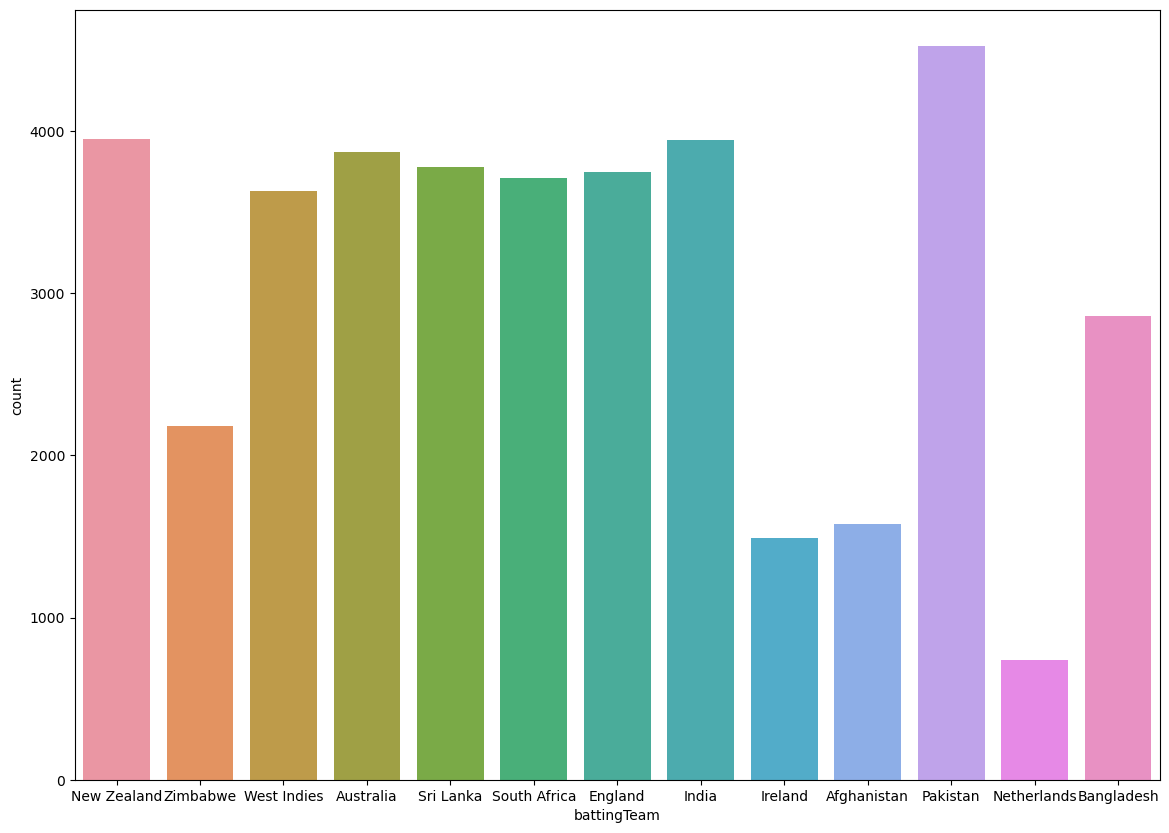

In [11]:
plt.figure(figsize=(14,10))
sns.countplot(x='battingTeam',data=df)
plt.show()

## Piechart for Batting-Team

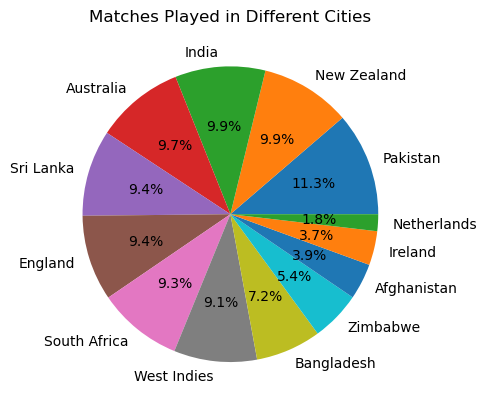

In [12]:
city_counts = df['battingTeam'].value_counts()
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Matches Played in Different Cities')
plt.show()

## Bowling Team

In [13]:
print(df['bowlingTeam'].unique())
print(df.value_counts(df['bowlingTeam']))

['Pakistan' 'Sri Lanka' 'Australia' 'India' 'South Africa' 'West Indies'
 'Netherlands' 'Bangladesh' 'New Zealand' 'England' 'Ireland' 'Zimbabwe'
 'Afghanistan']
bowlingTeam
Pakistan        4569
Australia       4001
India           3914
New Zealand     3906
South Africa    3850
West Indies     3806
England         3735
Sri Lanka       3609
Bangladesh      2681
Zimbabwe        2174
Afghanistan     1527
Ireland         1489
Netherlands      739
Name: count, dtype: int64


## Countplot on Bowling-Team 

<Axes: xlabel='bowlingTeam', ylabel='count'>

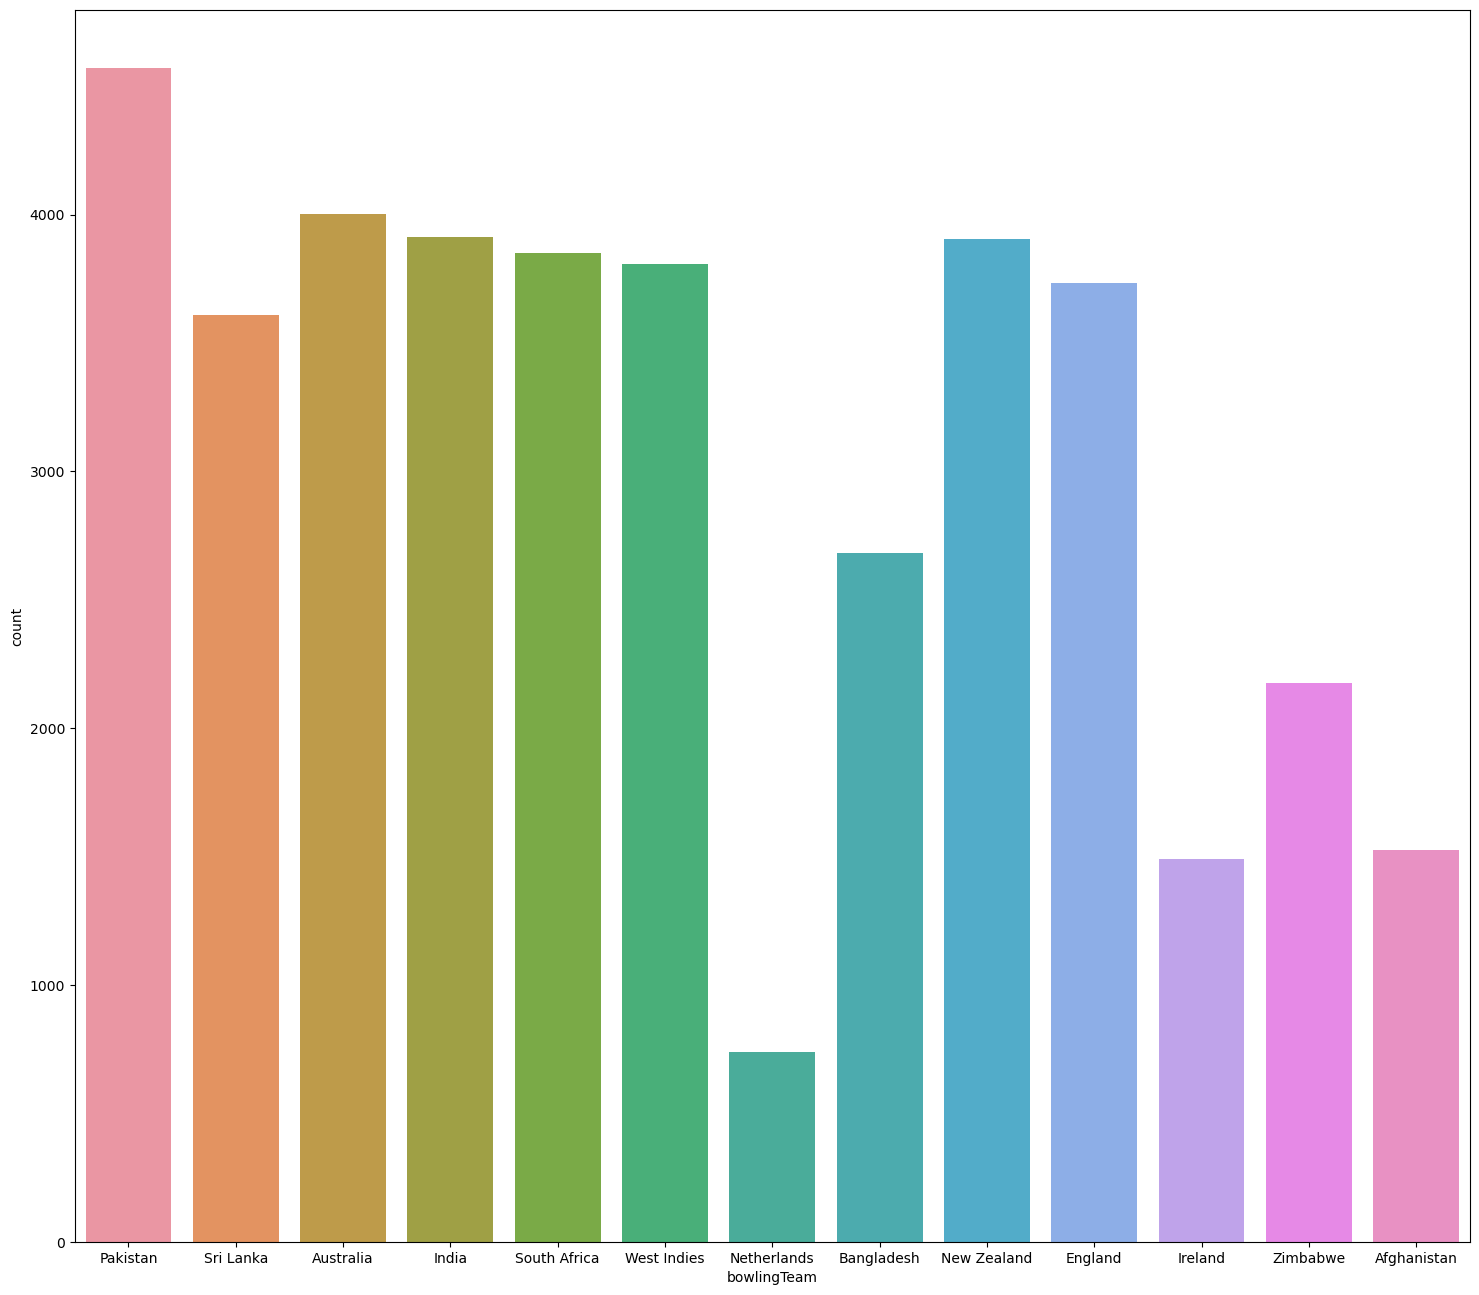

In [14]:
plt.figure(figsize=(18,16))
sns.countplot(x='bowlingTeam',data=df)

## Pie chart for Bowling-Team

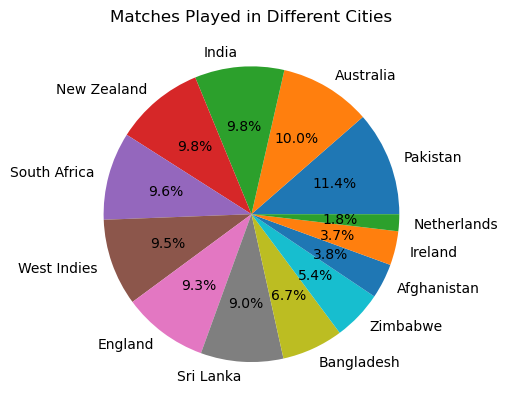

In [15]:
city_counts = df['bowlingTeam'].value_counts()
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Matches Played in Different Cities')
plt.show()

## Comparison between batting and bowling team

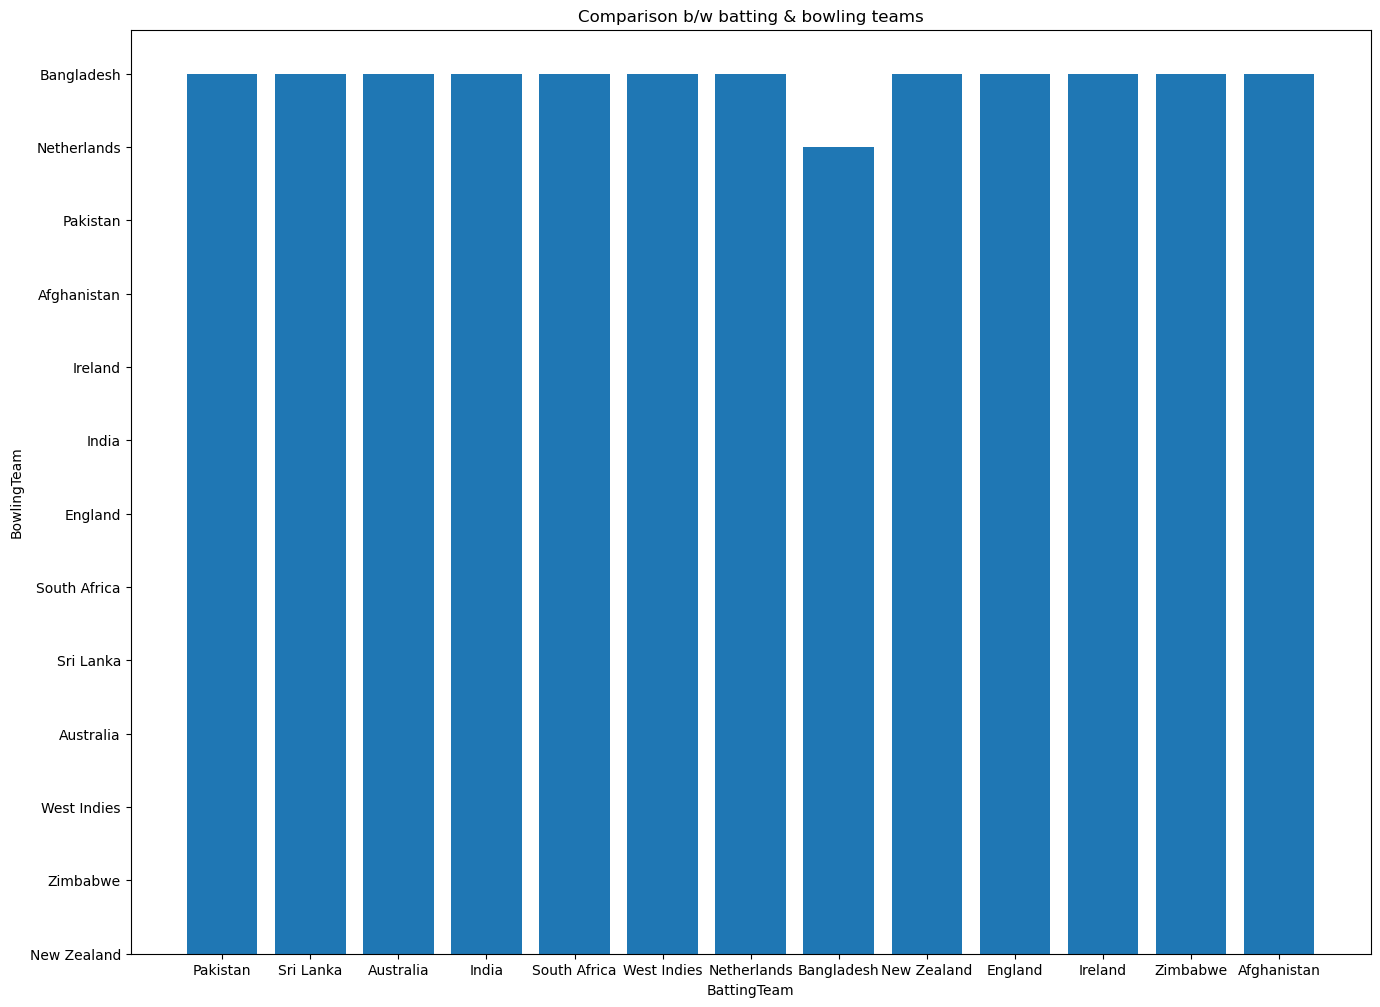

In [16]:
plt.figure(figsize=(16,12))
plt.title('Comparison b/w batting & bowling teams')
plt.xlabel('BattingTeam')
plt.ylabel('BowlingTeam')
plt.bar(df['bowlingTeam'],df['battingTeam'])
plt.show()

## City

In [121]:
print(df['city'].nunique())
print(df.value_counts(df['city']))

101
city
Dubai           2270
Colombo         2221
Mirpur          1537
Harare          1537
Johannesburg    1519
                ... 
Kanpur            51
Derry             46
Guwahati          44
Carrara           23
Bridgetown        10
Name: count, Length: 101, dtype: int64


## batting-team vs final score 

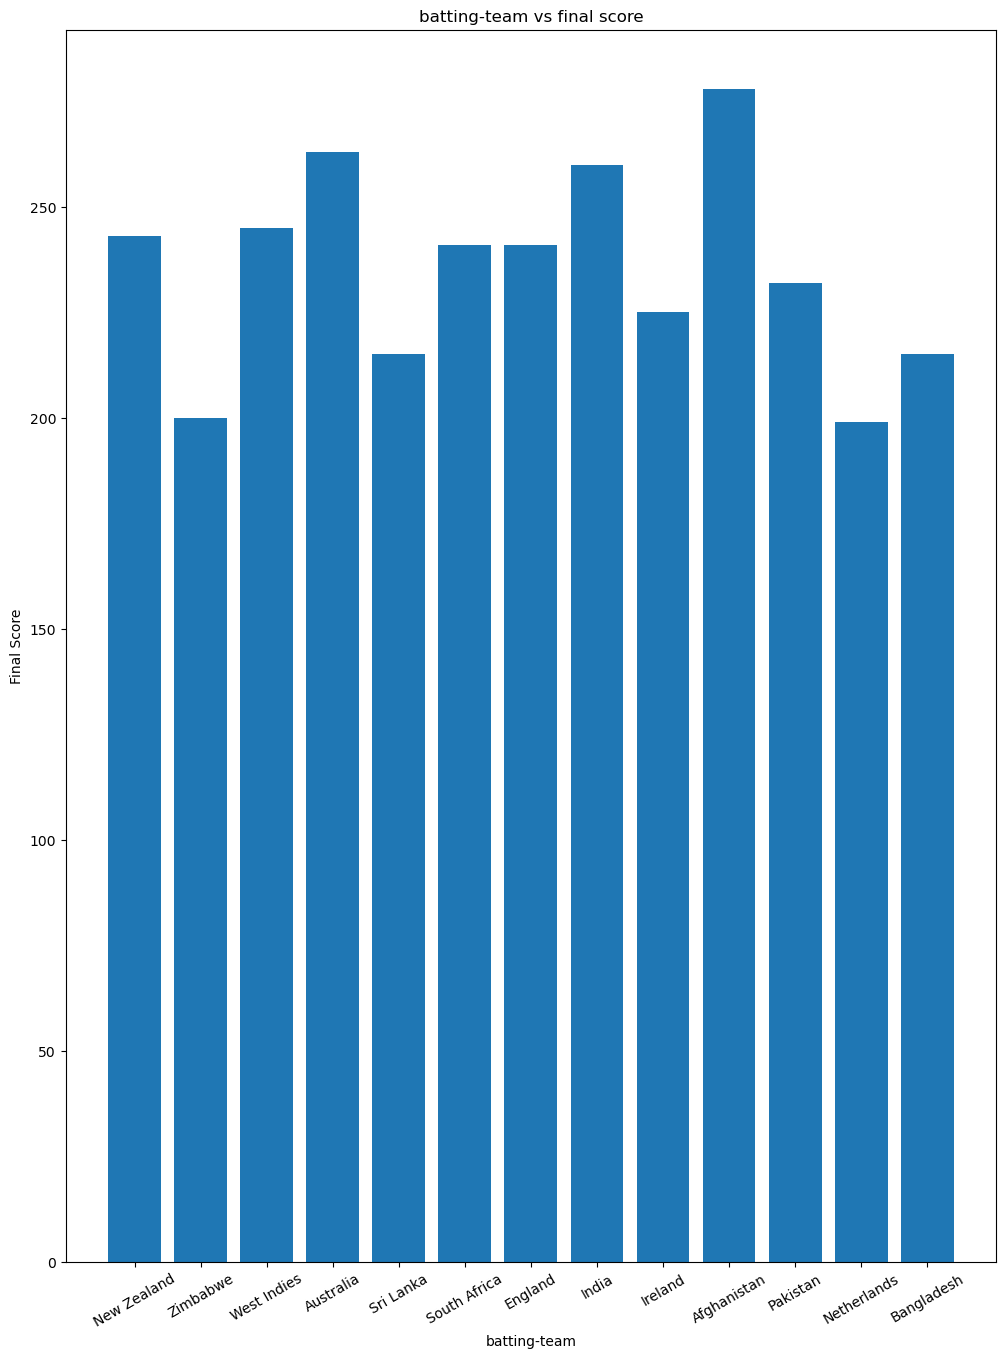

In [91]:
plt.figure(figsize=(12,16))
plt.bar(df['battingTeam'],df['Final_Score'])
plt.title('batting-team vs final score')
plt.xlabel('batting-team')
plt.ylabel('Final Score')
plt.xticks(rotation=30)
plt.show()

## bowling-team vs final score

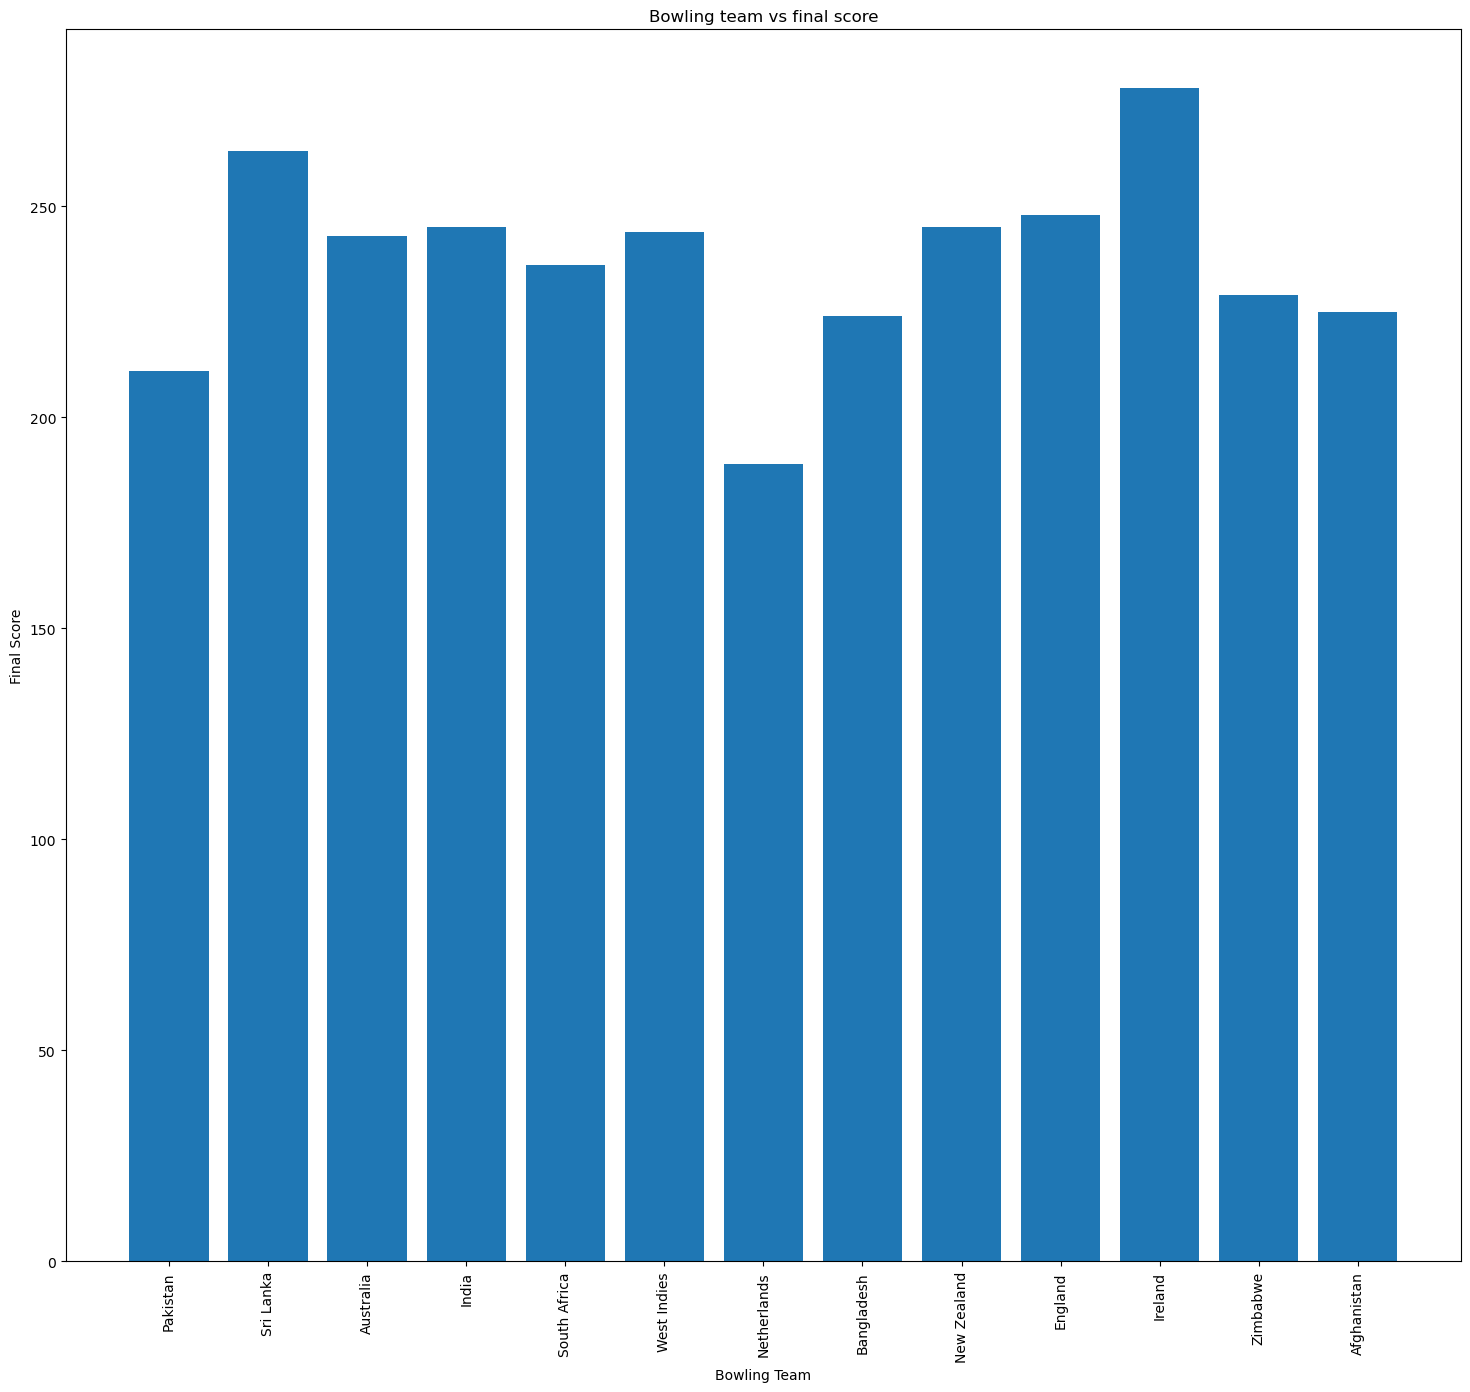

In [92]:
plt.figure(figsize=(18,16))
plt.bar(df['bowlingTeam'],df['Final_Score'])
plt.xlabel('Bowling Team')
plt.ylabel('Final Score')
plt.title('Bowling team vs final score')
plt.xticks(rotation=90)
plt.show()

In [93]:
df.head(5)

,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,0,138.162791,New Zealand,Pakistan,Dubai,63,56,5.894737,8,24.0,2.0,144,1
1,0,103.000000,Zimbabwe,Sri Lanka,Hambantota,40,76,5.700000,5,30.0,2.0,100,2
2,0,154.000000,West Indies,Australia,St Lucia,53,68,6.089552,5,27.0,3.0,105,1
3,0,146.285714,Australia,India,Bengaluru,18,159,9.352941,7,50.0,0.0,194,2
4,0,135.609756,Sri Lanka,South Africa,Colombo,42,82,6.307692,7,38.0,1.0,135,2


In [94]:
df['powerPlay'].unique()

array([0, 1])

## Pie plot for powerplay

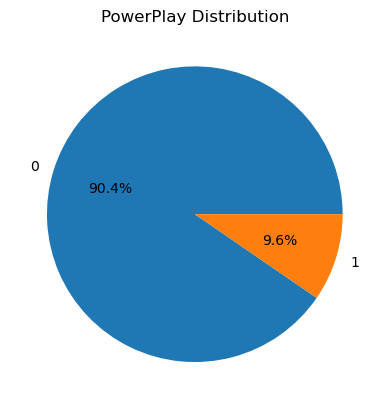

In [17]:
powerplay_counts = df['powerPlay'].value_counts()
plt.pie(powerplay_counts, labels=powerplay_counts.index, autopct='%1.1f%%')
plt.title('PowerPlay Distribution')
plt.show()


## Box Plot before outlier removal

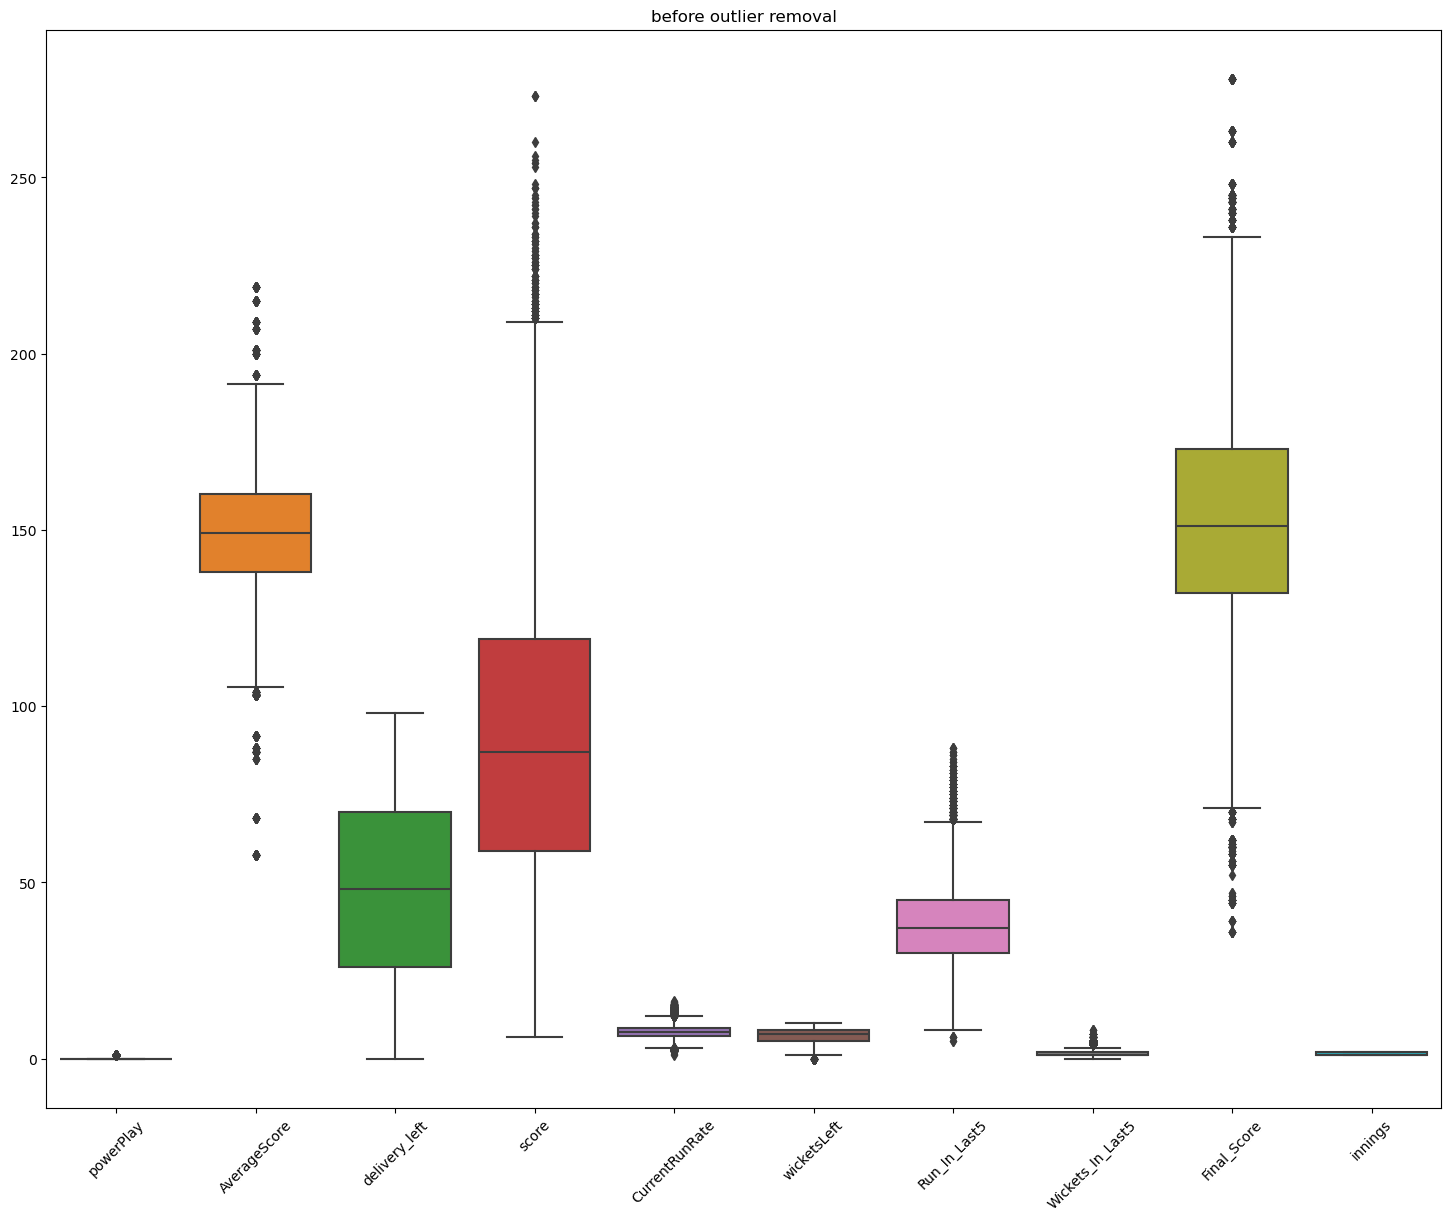

In [18]:
numerical_df = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(18,14))
sns.boxplot(data=df[numerical_df])
plt.xticks(rotation=45)
plt.title('before outlier removal')
plt.show()

## Outliers Detection

In [19]:
from scipy.stats import iqr

def outliers(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        IQR = iqr(data[column])

        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)

        LU = Q1 - 1.5 * IQR
        RU = Q3 + 1.5 * IQR
        
        data = data[(data[column] >= LU) & (data[column] <= RU)]

        print(f"After removing outliers in '{column}', {data.shape[0]} rows remain.")
    
    return data

df_clean = outliers(df)


After removing outliers in 'powerPlay', 36167 rows remain.
After removing outliers in 'AverageScore', 35567 rows remain.
After removing outliers in 'delivery_left', 35567 rows remain.
After removing outliers in 'score', 35369 rows remain.
After removing outliers in 'CurrentRunRate', 34920 rows remain.
After removing outliers in 'wicketsLeft', 34852 rows remain.
After removing outliers in 'Run_In_Last5', 34509 rows remain.
After removing outliers in 'Wickets_In_Last5', 32688 rows remain.
After removing outliers in 'Final_Score', 32275 rows remain.
After removing outliers in 'innings', 32275 rows remain.


## Box Plot after outlier removal

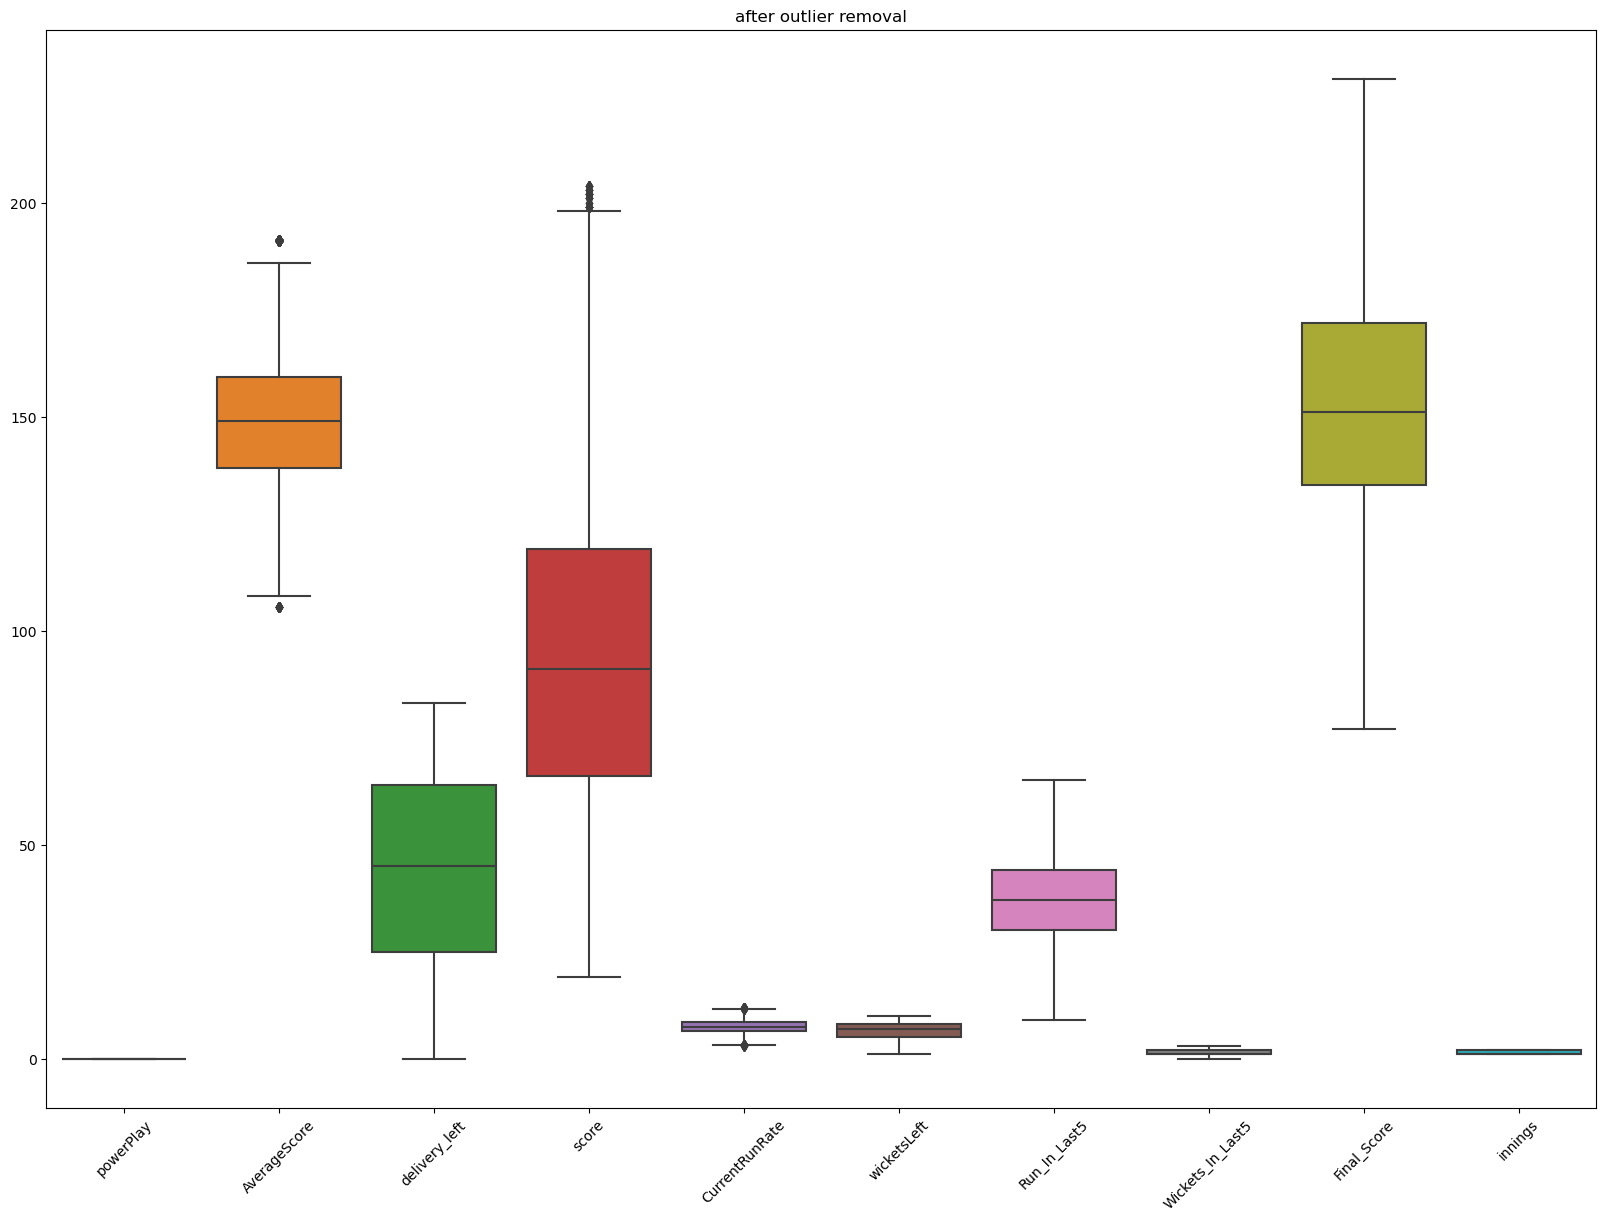

In [20]:
numerical_df_cleaned = df_clean.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20,14))
sns.boxplot(data=df_clean[numerical_df_cleaned])
plt.title('after outlier removal')
plt.xticks(rotation=45)
plt.show()

In [21]:
df_clean.shape

(32275, 13)

In [22]:
df.shape

(40000, 13)

In [23]:
obj = df_clean.select_dtypes(include='object').columns
print(obj)

Index(['battingTeam', 'bowlingTeam', 'city'], dtype='object')


## Splitting the data

In [24]:
X=df_clean.drop('Final_Score',axis=1)
y = df_clean['Final_Score']

## Splitting into training and testing

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_train.head()

,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,innings
35633,0,161.666667,South Africa,West Indies,St George's,21,120,7.272727,4,42.0,2.0,2
618,0,168.666667,Pakistan,New Zealand,Auckland,71,39,4.775510,6,19.0,3.0,1
35176,0,141.923077,England,Australia,Sydney,60,67,6.700000,6,42.0,1.0,2
18091,0,136.785714,Zimbabwe,Afghanistan,Sharjah,72,46,5.750000,5,28.0,3.0,2
4590,0,128.395349,England,Pakistan,Dubai,23,115,7.113402,6,43.0,2.0,2


## Feature Encoding for X_train and X_test

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first', sparse_output=False), [2, 3, 4])],remainder='passthrough')

ct.fit(X_train)

X_train_encoded = ct.transform(X_train)
X_test_encoded = ct.transform(X_test)

X_train_encoded_df = pd.DataFrame(X_train_encoded)
X_test_encoded_df = pd.DataFrame(X_test_encoded)

X_train_encoded_df.reset_index(drop=True, inplace=True)
X_test_encoded_df.reset_index(drop=True, inplace=True)


In [28]:
X_train_encoded_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,161.666667,21.0,120.0,7.272727,4.0,42.0,2.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,168.666667,71.0,39.0,4.775510,6.0,19.0,3.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,141.923077,60.0,67.0,6.700000,6.0,42.0,1.0,2.0


## Scaling the data

In [29]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(X_train)

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_encoded_df,y_train)
lr_predict = model.predict(X_test_encoded_df)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_lr = r2_score(y_test, lr_predict)

lr_mse = mean_squared_error(y_test,lr_predict)

lr_mae = mean_absolute_error(y_test,lr_predict)

lr_rmse = np.sqrt(lr_mse)

print(f'r2 is : {r2_lr}')
print(f'mean squared error is: {lr_mse}')
print(f'root mean squared error is: {lr_rmse}')
print(f'mean absolute error is: {lr_mae}')

r2 is : 0.6482565117564163
mean squared error is: 283.4065172594654
root mean squared error is: 16.834681976784278
mean absolute error is: 12.806679306747684


## Support Vector Regressor

In [32]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_encoded_df,y_train)
svr_predict = svr.predict(X_test_encoded_df)

In [33]:
from sklearn.metrics import r2_score

r2_svr = r2_score(y_test, svr_predict)

svr_mse = mean_squared_error(y_test,svr_predict)

svr_mae = mean_absolute_error(y_test,svr_predict)

svr_rmse = np.sqrt(svr_mse)

print(f'r2 is : {r2_svr}')
print(f'mean squared error is: {svr_mse}')
print(f'root mean squared error is: {svr_rmse}')
print(f'mean absolute error is: {svr_mae}')

r2 is : 0.6096692083251458
mean squared error is: 314.4970523835085
root mean squared error is: 17.734064745103094
mean absolute error is: 13.275024015554056


## Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train_encoded_df,y_train)
dtr_predict = dtr.predict(X_test_encoded_df)

In [35]:
from sklearn.metrics import r2_score

r2_dtr = r2_score(y_test,dtr_predict)

dtr_mse = mean_squared_error(y_test,dtr_predict)

dtr_mae = mean_absolute_error(y_test,dtr_predict)

dtr_rmse = np.sqrt(lr_mse)

print(f'r2 is : {r2_dtr}')
print(f'mean squared error is: {dtr_mse}')
print(f'root mean squared error is: {dtr_rmse}')
print(f'mean absolute error is: {dtr_mae}')

r2 is : 0.8004911375500764
mean squared error is: 160.74814107198182
root mean squared error is: 16.834681976784278
mean absolute error is: 5.058814417019518


## Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_encoded_df,y_train)
rfr_predict = rfr.predict(X_test_encoded_df)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_rfr = r2_score(y_test,rfr_predict)

rfr_mse = mean_squared_error(y_test,rfr_predict)

rfr_mae = mean_absolute_error(y_test,rfr_predict)

rfr_rmse = np.sqrt(rfr_mse)

print(f'r2 is : {r2_rfr}')
print(f'mean squared error is: {rfr_mse}')
print(f'root mean squared error is: {rfr_rmse}')
print(f'mean absolute error is: {rfr_mae}')

r2 is : 0.9118569839279557
mean squared error is: 71.0185292426059
root mean squared error is: 8.427249209712853
mean absolute error is: 5.220043448754075


## Gradient Boosting Regressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_encoded_df,y_train)
gbr_predict = gbr.predict(X_test_encoded_df)

In [39]:
from sklearn.metrics import r2_score

r2_gbr = r2_score(y_test, gbr_predict)

gbr_mse = mean_squared_error(y_test,gbr_predict)

gbr_mae = mean_absolute_error(y_test,gbr_predict)

gbr_rmse = np.sqrt(gbr_mse)

print(f'r2 is : {r2_gbr}')
print(f'mean squared error is: {gbr_mse}')
print(f'root mean squared error is: {gbr_rmse}')
print(f'mean absolute error is: {gbr_mae}')

r2 is : 0.6730749424644322
mean squared error is: 263.4098286329703
root mean squared error is: 16.229905379667816
mean absolute error is: 12.212658159375975


## XGBoost Regressor

In [40]:
import xgboost as xg
xgbr = xg.XGBRegressor()
xgbr.fit(X_train_encoded_df,y_train)
xgbr_predict = xgbr.predict(X_test_encoded_df)

In [41]:
from sklearn.metrics import r2_score

r2_xgbr = r2_score(y_test, xgbr_predict)

xgbr_mse = mean_squared_error(y_test,xgbr_predict)

xgbr_mae = mean_absolute_error(y_test,xgbr_predict)

xgbr_rmse = np.sqrt(xgbr_mse)

print(f'r2 is : {r2_xgbr}')
print(f'mean squared error is: {xgbr_mse}')
print(f'root mean squared error is: {xgbr_rmse}')
print(f'mean absolute error is: {xgbr_mae}')

r2 is : 0.8445671847259364
mean squared error is: 125.23521917810444
root mean squared error is: 11.190854264894368
mean absolute error is: 8.189401113850314


## AdaBoost Regressor

In [42]:
from sklearn.ensemble import AdaBoostRegressor
adbr = AdaBoostRegressor()
adbr.fit(X_train_encoded_df,y_train)
adbr_predict = adbr.predict(X_test_encoded_df)

In [43]:
from sklearn.metrics import r2_score

r2_adbr = r2_score(y_test, adbr_predict)

adbr_mse = mean_squared_error(y_test,adbr_predict)

adbr_mae = mean_absolute_error(y_test,adbr_predict)

adbr_rmse = np.sqrt(adbr_mse)

print(f'r2 is : {r2_adbr}')
print(f'mean squared error is: {adbr_mse}')
print(f'root mean squared error is: {adbr_rmse}')
print(f'mean absolute error is: {adbr_mae}')

r2 is : 0.5735915887554208
mean squared error is: 343.565486782462
root mean squared error is: 18.535519598394377
mean absolute error is: 14.40481731917625


## Comparision of r2_score between differnt models using bar graph

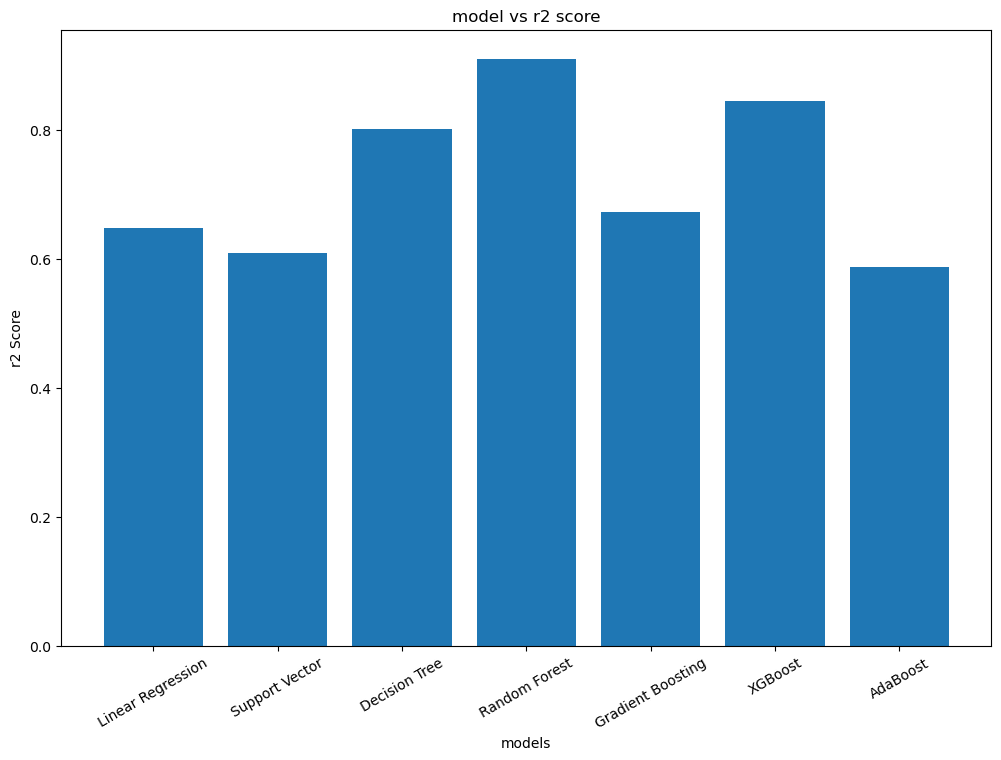

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
r2_comparision = [r2_lr,r2_svr,r2_dtr,r2_rfr,r2_gbr,r2_xgbr,r2_adbr]
models=['Linear Regression','Support Vector','Decision Tree','Random Forest','Gradient Boosting','XGBoost','AdaBoost']
plt.bar(models,r2_comparision)
plt.xlabel('models')
plt.ylabel('r2 Score')
plt.xticks(rotation=30)
plt.title('model vs r2 score')
plt.show()